## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [174]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']

In [4]:
def get_estimate_price(value,k,b):
    return k*value+b

In [9]:
def get_loss(y, y_hat):
    m = y.shape[0]
    return np.sum(np.square(y_hat-y))/(2*m)

In [13]:
# best_k = random.randint(-100,100)
# best_b = random.randint(-100,100)

In [175]:
feature = X[:,5]

In [176]:
feature

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,


## 1. Random Choose Method to get optimal *k* and *b*

In [49]:
best_loss = np.inf
best_k = best_b = 0
for i in range(100):
    random_k = random.randint(-100,100)
    random_b = random.randint(-100,100)
    y_estimate = feature*random_k + random_b
    loss = get_loss(y,y_estimate)
    if loss < best_loss:
        best_loss = loss
        best_k,best_b = random_k, random_b
        print(i,random_k,random_b,loss)
print(best_k,best_b,best_loss)

0 -73 -6 240836.8632961719
1 44 -51 41849.02513318577
2 -28 66 18278.759113138338
7 3 -35 1558.003969610672
31 13 -56 61.119023998023714
13 -56 61.119023998023714


## 2.Supervised Direction to get optimal *k* and *b*

In [150]:
random.sample([-1,1],)

[-1, 1]

In [178]:
best_loss = np.inf
best_k , best_b = random.randint(-100,100),random.randint(-100,100)
alpha = 0.5
for i in range(1000):
    dir_k, dir_b = random.sample([-1,1],1)[0], random.sample([-1,1],1)[0]
    curr_k, curr_b = best_k+dir_k*alpha, best_b+dir_b*alpha
    y_estimate = curr_k*feature + curr_b
    loss = get_loss(y,y_estimate)
    if loss < best_loss:
        best_loss = loss
        best_k,best_b = curr_k, curr_b
        print('{} times:'.format(i),best_k,best_b,best_loss)
print('best:',best_k,best_b,best_loss)

0 times: -36.5 90.5 27125.23568550543
2 times: -36.0 90.0 26256.816710102765
3 times: -35.5 90.5 25091.33310846196
5 times: -35.0 90.0 24256.61882327075
7 times: -34.5 90.5 23137.409180616105
8 times: -34.0 91.0 22044.978834648224
9 times: -33.5 90.5 21263.463901967883
10 times: -33.0 91.0 20217.307514986165
12 times: -32.5 91.5 19197.930424691203
13 times: -32.0 91.0 18469.61484452174
15 times: -31.5 90.5 17755.50929226433
16 times: -31.0 90.0 17055.61376791897
17 times: -30.5 89.5 16369.92827148567
18 times: -30.0 89.0 15698.452802964426
20 times: -29.5 89.5 14803.328320853261
23 times: -29.0 89.0 14165.55754254348
24 times: -28.5 89.5 13316.707019418478
25 times: -28.0 90.0 12494.635792980238
29 times: -27.5 90.5 11699.343863228756
31 times: -27.0 90.0 11134.26709972925
32 times: -26.5 90.5 10385.249128963935
33 times: -26.0 91.0 9663.010454885374
35 times: -25.5 91.5 8967.551077493577
36 times: -25.0 91.0 8475.168328804346
38 times: -24.5 90.5 7996.995608027174
39 times: -24.0 91.0

## 3.Gradient Descent to get optimal *k* and *b*

求损失函数的导数
1/m * np.sum(y-y_es)*xj


$$  -\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ ({ y }_{ i }-\hat { { y }_{ i } } ){ x }_{ i } }   $$

更新后权重为

$$ { \theta  }^{ ' }\quad =\quad \theta +\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ ({ y }_{ i }-\hat { { y }_{ i } } ){ x }_{ i } }  $$

In [167]:
def get_loss(feature,k,b,y):
    m = y.shape[0]
    y_hat = k*feature+b
    return np.sum(np.square(y_hat-y))/(2*m)

In [645]:
curr_k , curr_b = random.randint(-100,100), random.randint(-100,100)
alpha = 0.02
m = feature.shape[0]

loss = get_loss(feature,curr_k, curr_b, y)
print('l0ss:{},  k:{},  b:{}'.format(loss,curr_k,curr_b,))

for i in range(30):
    y_hat = curr_k*feature + curr_b
    error = y - y_hat
    curr_k = curr_k + alpha*np.sum(error*feature)/m

    curr_b = curr_b + alpha*np.sum(error)/m
    loss = get_loss(feature,curr_k,curr_b,y)
    print('l0ss:{},  k:{},  b:{}'.format(loss,curr_k,curr_b,))


l0ss:111600.58117046244,  k:-58,  b:-83
l0ss:3663.308833342655,  k:1.7420099180237116,  b:-73.59916798418972
l0ss:148.4745682081463,  k:12.521551456973265,  b:-71.8954864067021
l0ss:34.01488198093057,  k:14.465620966834187,  b:-71.58078800947563
l0ss:30.28376788284216,  k:14.815294655868307,  b:-71.51673890205517
l0ss:30.15838090546375,  k:14.877253547353947,  b:-71.49792220259224
l0ss:30.15041139422583,  k:14.887293432841522,  b:-71.48726961671922
l0ss:30.14626729191228,  k:14.887964601385312,  b:-71.47809202275526
l0ss:30.142249626879742,  k:14.886945421941558,  b:-71.46918234164879
l0ss:30.138237946252616,  k:14.885621486684576,  b:-71.46032275076087
l0ss:30.134228326749046,  k:14.884242831171338,  b:-71.45147394270984
l0ss:30.130220639715272,  k:14.882854575247386,  b:-71.44262882390291
l0ss:30.126214880064808,  k:14.88146486090253,  b:-71.43378611385374
l0ss:30.122211046735448,  k:14.880075157325349,  b:-71.42494558107435
l0ss:30.11820913879643,  k:14.878685729570892,  b:-71.41610

## 4. Try different Loss function and learning rate. 

1) 假如 损失函数为 $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$：

In [169]:
def get_loss(feature,k,b,y):
    m = y.shape[0]
    y_hat = k*feature+b
    return np.sum(np.abs(y-y_hat))/m

- 当 y-kx-b >=0 k,b 的偏导数为: -x -1
- y-kx-b <0   k,b 的偏导数为:  x 1

In [189]:
curr_k , curr_b = random.randint(-100,100), random.randint(-100,100)
alpha = 0.1
m = feature.shape[0]

loss = get_loss(feature,curr_k, curr_b, y)
print('l0ss:{},  k:{},  b:{}'.format(loss,curr_k,curr_b,))

for i in range(100):
    y_hat = curr_k*feature + curr_b
    error = y - y_hat
    gte0 = error>=0
    direction = np.ones_like(error)
    direction[gte0] = -1
    derivative_k = np.sum(feature*direction)/m 
    curr_k = curr_k - alpha*derivative_k
    derivative_b = np.sum(direction)/m
    curr_b = curr_b - alpha*derivative_b
    loss = get_loss(feature,curr_k,curr_b,y)
    print('l0ss:{},  k:{},  b:{}'.format(loss,curr_k,curr_b,))


l0ss:109.64866600790515,  k:-25,  b:70
l0ss:105.5990030696367,  k:-24.371536561264822,  b:70.1
l0ss:101.54934013136825,  k:-23.743073122529644,  b:70.19999999999999
l0ss:97.49967719309981,  k:-23.114609683794466,  b:70.29999999999998
l0ss:93.45001425483137,  k:-22.486146245059288,  b:70.39999999999998
l0ss:89.40035131656292,  k:-21.85768280632411,  b:70.49999999999997
l0ss:85.35068837829449,  k:-21.229219367588932,  b:70.59999999999997
l0ss:81.30102544002605,  k:-20.600755928853754,  b:70.69999999999996
l0ss:77.2513625017576,  k:-19.972292490118576,  b:70.79999999999995
l0ss:73.20169956348916,  k:-19.3438290513834,  b:70.89999999999995
l0ss:69.15203662522073,  k:-18.71536561264822,  b:70.99999999999994
l0ss:65.10237368695228,  k:-18.086902173913042,  b:71.09999999999994
l0ss:61.05271074868385,  k:-17.458438735177864,  b:71.19999999999993
l0ss:57.003047810415396,  k:-16.829975296442687,  b:71.29999999999993
l0ss:52.953384872146955,  k:-16.20151185770751,  b:71.39999999999992
l0ss:48.903

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 因为复杂的公式不能很好的适应数据。也就是人为设定的规则效果很差，而从数据中学到的方法能够适应数据变化

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 要试验很多次才能发现找到最好的参数，得到最庸参数有一定盲目性而且不知道是否是最优参数，另外在参数很多的情况下几乎计算量很大。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:是的，第二种方法实在当前参数的基础上随机增大或减少参数，来调整，他是以数据结果为导向。每一轮都是在尝试一小步的优化。
缺点是优化方向依然具有一定的盲目性。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 因为导数，梯度代表了待求解参数变化最快的方向，我们沿着这个导数的方向能最快的得到最优解。

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 梯度，代表每个参数与之对应的偏导数方向，下降是指参数沿着偏导数方向一点一点的变化。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:快。效率高。有理论上的证明其最终求出的结果一定是局部最小值。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 从数据中总结中一个事物的规律，并用之于相应的任务中。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [234]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
metro_url = 'http://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1'

resp = requests.get(metro_url)

soup = BeautifulSoup(resp.text)

lines = soup.find_all('div','line_place')

raw_lines = [(line.td.text[:-6].strip(),[sta.th.text.strip() for sta in line.find('tbody').find_all('tr')]) for line in lines]

In [240]:
tset = defaultdict(set)

In [249]:
tset['q'].add('sss')
tset

defaultdict(set, {'q': {'dssd', 'sss'}})

In [250]:
bj_graph = defaultdict(list)
metro_belong = defaultdict(set)
for name,line in raw_lines:
    pre = None
    for station in line:
        metro_belong[station].add(name)
        if pre is None:
            pre = station
        else:
            bj_graph[pre].append(station)
            bj_graph[station].append(pre)
            pre = station

In [210]:
line0 = lines[0]

In [221]:
import pickle

In [252]:
with open('metro_belong.data','wb') as f:
    pickle.dump(metro_belong,f)

In [220]:
[line.td.text[:-6].strip() for line in lines]

['1号线',
 '2号线',
 '4号线/大兴线',
 '5号线',
 '6号线',
 '7号线',
 '8号线（北段）',
 '9号线',
 '10号线',
 '13号线',
 '14号线（西段）',
 '15号线',
 '16号线',
 '八通线',
 '昌平线',
 '亦庄线',
 '4号线/大兴线',
 '房山线',
 'S1线',
 '燕房线']

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [3]:
import networkx as nx

In [18]:
city_graph = nx.Graph(bj_graph)

In [12]:
nodes_for_graph  = {}
for k,v in bj_graph.items():
    for stat in v:
        a,b =(k,stat) if k>stat else (stat,k)
        nodes_for_graph[a] = b
        

In [136]:
%matplotlib inline

In [137]:
plt.figure(figsize=(30,16))

<Figure size 2160x1152 with 0 Axes>

<Figure size 2160x1152 with 0 Axes>

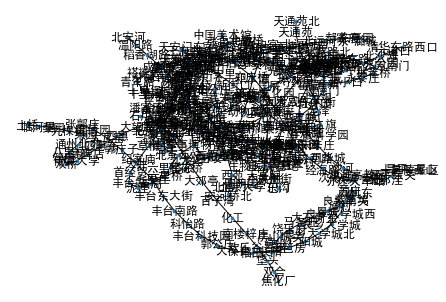

In [140]:
nx.draw(city_graph, with_labels=True, node_size=7)

In [74]:
import copy

In [190]:

def search(source,target):
    ret = dfs(source,target,[])
    print(ret)
def dfs(node,target,path):
    new_path = copy.copy(path)+[node]
    #print(node,target,path)
    if node == target:
        return new_path
    edges = bj_graph[node]
    #print(node,edges,end=',,')
    is_visited[node] = True
    option_route = []
    for e in edges:
        if e not in is_visited:
            ret = dfs(e,target,new_path)
            if ret != []:
                option_route.append(ret)
    if option_route == []:
        return option_route
    else:
        return min(option_route,key=lambda x:len(x))        

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [162]:
is_visited = {}
search('奥体中心', '公主坟')

['奥体中心', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '回龙观东大街', '平西府', '育知路', '朱辛庄', '生命科学园', '西二旗', '上地', '五道口', '知春路', '知春里', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '东单', '王府井', '天安门东', '天安门西', '西单', '复兴门', '南礼士路', '木樨地', '军事博物馆', '公主坟']


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [424]:
def is_goal(station, target):
    return station == target

def get_successor(station):
    return bj_graph[station]

def strategy():
    pass
def bfs(start, target, strategy_func):
    is_visited = {}
    unprocessed = [[start]]
    while unprocessed:
        #print(unprocessed)
        path = unprocessed.pop(0)
        frontier = path[-1]
        if frontier in is_visited:
            continue
        is_visited[frontier] = True
        for station in bj_graph[frontier]:
            if station not in is_visited:
                new_path = path + [station]
                unprocessed.append(new_path)
                if station == target:
                    return new_path
        unprocessed = strategy_func(unprocessed)
        
def get_transfer_number(path):
    if len(path) < 3:
        return 0
    trans_num = 0
    last_line = (metro_belong[path[0]] & metro_belong[path[1]]).pop()
    last_station = path[1]
    for p in path[2:]:
        current_line = (metro_belong[p] & metro_belong[last_station]).pop()
        if current_line != last_line:
            trans_num += 1
        last_station = p
        last_line = current_line
    return trans_num

def Shortest_Path_Priority(path):
    return sorted(path,key=len)

def Minimum_Transfer_Priority(pathes):
    return sorted(pathes,key=get_transfer_number)
        
def Comprehensive_Priority(pathes):
    def get_weight(path):
        trans_num = get_transfer_number(path)
        route_len = len(path)
        trans_weight = df_transfer.iloc[trans_num][0] if trans_num in df_transfer.index else 1
        length_weight = df_length.iloc[trans_num][0] if route_len in df_length.index else 1
        return trans_weight+length_weight
    return sorted(pathes,key=get_weight)

In [413]:
from itertools import  combinations
from collections import Counter
import random

## 统计乘车长度和换成次数

In [ ]:
route_length = []

for s,t in combinations(bj_graph.keys(),2):
    ret = bfs(s,t,Shortest_Path_Priority)
    route_length.append(len(ret))

total_len = len(route_length)

df_length = pd.DataFrame({k:[v/total_len] for k,v in Counter(route_length).items()}).T.cumsum()

route_transfer = []
cnt = 0
all_station = bj_graph.keys()
len_stat = len(all_station)
for i in range(3000):
    s,t = random.sample(bj_graph.keys(),2)
    
    ret = bfs(s,t,Minimum_Transfer_Priority)
    trans_num = get_transfer_number(ret)
    route_transfer.append(trans_num)
    if cnt%1000 == 0:
        print(cnt)
    cnt += 1
total_transfer = len(route_transfer)
df_transfer = pd.DataFrame({k:[v/total_transfer] for k,v in Counter(route_transfer).items()}).T.cumsum()

## 不同策略下的路线

In [428]:
ret = bfs('魏公村','传媒大学',Shortest_Path_Priority)
print('-->'.join(ret))

魏公村-->国家图书馆-->动物园-->西直门-->积水潭-->鼓楼大街-->什刹海-->南锣鼓巷-->东四-->朝阳门-->建国门-->永安里-->国贸-->大望路-->四惠-->四惠东-->高碑店-->传媒大学


In [429]:
ret = bfs('魏公村','传媒大学',Minimum_Transfer_Priority)
print('-->'.join(ret))

魏公村-->国家图书馆-->动物园-->西直门-->新街口-->平安里-->西四-->灵境胡同-->西单-->天安门西-->天安门东-->王府井-->东单-->建国门-->永安里-->国贸-->大望路-->四惠-->四惠东-->高碑店-->传媒大学


In [430]:
ret = bfs('魏公村','传媒大学',Comprehensive_Priority)
print('-->'.join(ret))

魏公村-->国家图书馆-->动物园-->西直门-->新街口-->平安里-->西四-->灵境胡同-->西单-->天安门西-->天安门东-->王府井-->东单-->建国门-->永安里-->国贸-->大望路-->四惠-->四惠东-->高碑店-->传媒大学


## 增加 by_way 参数

改动原理的原理是 ：<br>
  首先 用BFS 搜索 by_way中的值，<br>
  当搜索到by_way 中的值的时候，就把 当前path路径 设为 unprocessed继续搜索下一个By_way中的值，<br>
  如此直到by_way中所有站点都遍历到了，<br>

In [548]:
def bfs_byway(start, target,by_way,can_repeate=False,strategy_func=lambda x:x):
    by_way = set(by_way)
    is_visited = {}
    unprocessed = [[start]]
    while unprocessed:
        #print(unprocessed)
        path = unprocessed.pop(0)
        frontier = path[-1]
        if frontier in is_visited:
            continue
        is_visited[frontier] = True
        for station in bj_graph[frontier]:
            if station in is_visited: continue
            new_path = path + [station]
            if station in by_way:
                print(station,new_path)
                by_way.remove(station)
                unprocessed = [new_path]
                break
            else:
                if (station != target):
                    unprocessed.append(new_path)
            if (not by_way)&(station == target):
                return new_path
        unprocessed = strategy_func(unprocessed)
        

In [556]:
ret = bfs_byway('古城','五道口',by_way=['泥洼','北苑'])
ret

泥洼 ['古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '莲花桥', '六里桥', '西局', '泥洼']
北苑 ['古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '莲花桥', '六里桥', '西局', '泥洼', '丰台站', '首经贸', '纪家庙', '草桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '和平门', '前门', '崇文门', '北京站', '建国门', '朝阳门', '东四十条', '东直门', '柳芳', '光熙门', '芍药居', '望京西', '北苑']


['古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '莲花桥',
 '六里桥',
 '西局',
 '泥洼',
 '丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西',
 '马家堡',
 '北京南站',
 '陶然亭',
 '菜市口',
 '宣武门',
 '和平门',
 '前门',
 '崇文门',
 '北京站',
 '建国门',
 '朝阳门',
 '东四十条',
 '东直门',
 '柳芳',
 '光熙门',
 '芍药居',
 '望京西',
 '北苑',
 '立水桥',
 '霍营',
 '回龙观',
 '龙泽',
 '西二旗',
 '上地',
 '五道口']

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


**不同的原因是 我们采用的BFS只是对每一次搜索，采用的是最优策略，但是总体未必是最优策略，百度地图的算法应该是采用的是Djstra之类的最优算法。另外，Comprehensive_Priority策略中，不同因素的权重和计算方式不同，也会导致不同的结果.**

恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)